## circuiti_3

In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append("D:/Progetti/LabProgram")
from Routine import Routine
from Funnel import Funnel 
import lab_utilities as lu
from matplotlib import pyplot as plt
from scipy.signal import hilbert
import re

In [2]:
lu.setDefaultGraphStyle()

## Parte 1

In [3]:
#load the data
data_gen = pd.read_csv("data/RC/132_5/F0000CH1.CSV")
data_gen = data_gen.iloc[18:]
data_gen = data_gen.iloc[:,[3,4]]
data_gen.columns = ["time", "voltage"]
data_ch2 = pd.read_csv("data/RC/132_5/F0000CH2.CSV")
data_ch2 = data_ch2.iloc[18:]
data_ch2 = data_ch2.iloc[:,[3,4]]
data_ch2.columns = ["time", "voltage"]
data_math = pd.read_csv("data/RC/132_5/F0000MTH.CSV")
data_math = data_math.iloc[18:]
data_math = data_math.iloc[:,[3,4]]
data_math.columns = ["time", "voltage"]

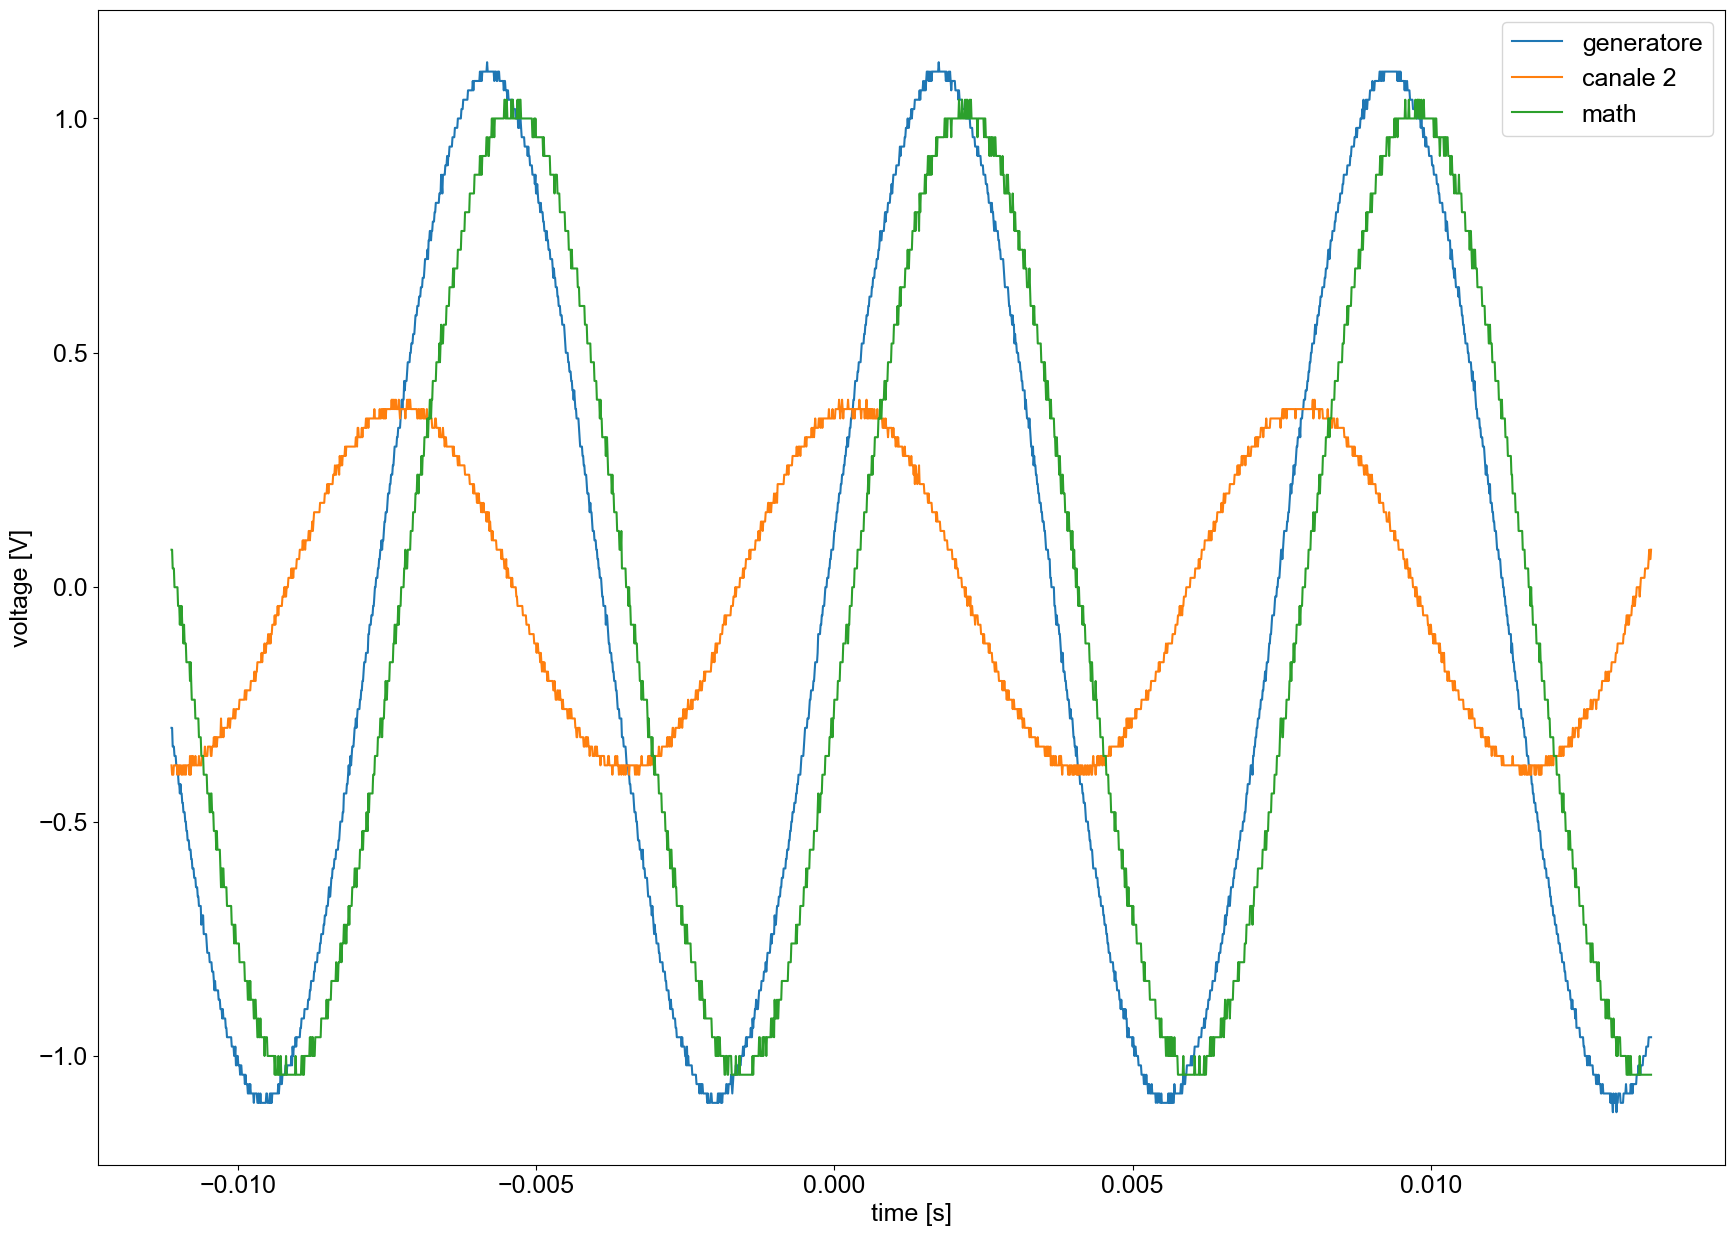

In [4]:
#plot all the data in one graph
plt.plot(data_gen["time"], data_gen["voltage"], label="generatore")
plt.plot(data_ch2["time"], data_ch2["voltage"], label="canale 2")
plt.plot(data_math["time"], data_math["voltage"], label="math")
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")
plt.legend()

In [9]:
def phase_diff(d1, d2):
    """Compute the phase difference between two signals"""
    analytic_signal1 = hilbert(d1)
    analytic_signal2 = hilbert(d2)
    c = np.inner( analytic_signal1, np.conj(analytic_signal2) ) / np.sqrt( np.inner(analytic_signal1,np.conj(analytic_signal1)) * np.inner(analytic_signal2,np.conj(analytic_signal2)) )
    #c_error = np.sqrt( 1 - np.abs(c)**2 ) / np.sqrt( np.inner(analytic_signal1,np.conj(analytic_signal1)) * np.inner(analytic_signal2,np.conj(analytic_signal2)) )
    return (np.angle(c))

In [6]:
print("phase difference: ", phase_diff(data_gen["voltage"], data_ch2["voltage"]))

phase difference:  1.1747754692200405


In [19]:
#TO RENAME
path = "data/RC"

for subdir, dirs, files in os.walk(path):
    for filename in files:
        if ".CSV" in filename:
            #new name = old name from first charachter to -9 characters before end + "0" + old name from -8 charachters before end to end
            new_filename = filename[:-8] + "0" + filename[-7:]
            os.rename(os.path.join(subdir, filename), os.path.join(subdir, new_filename))

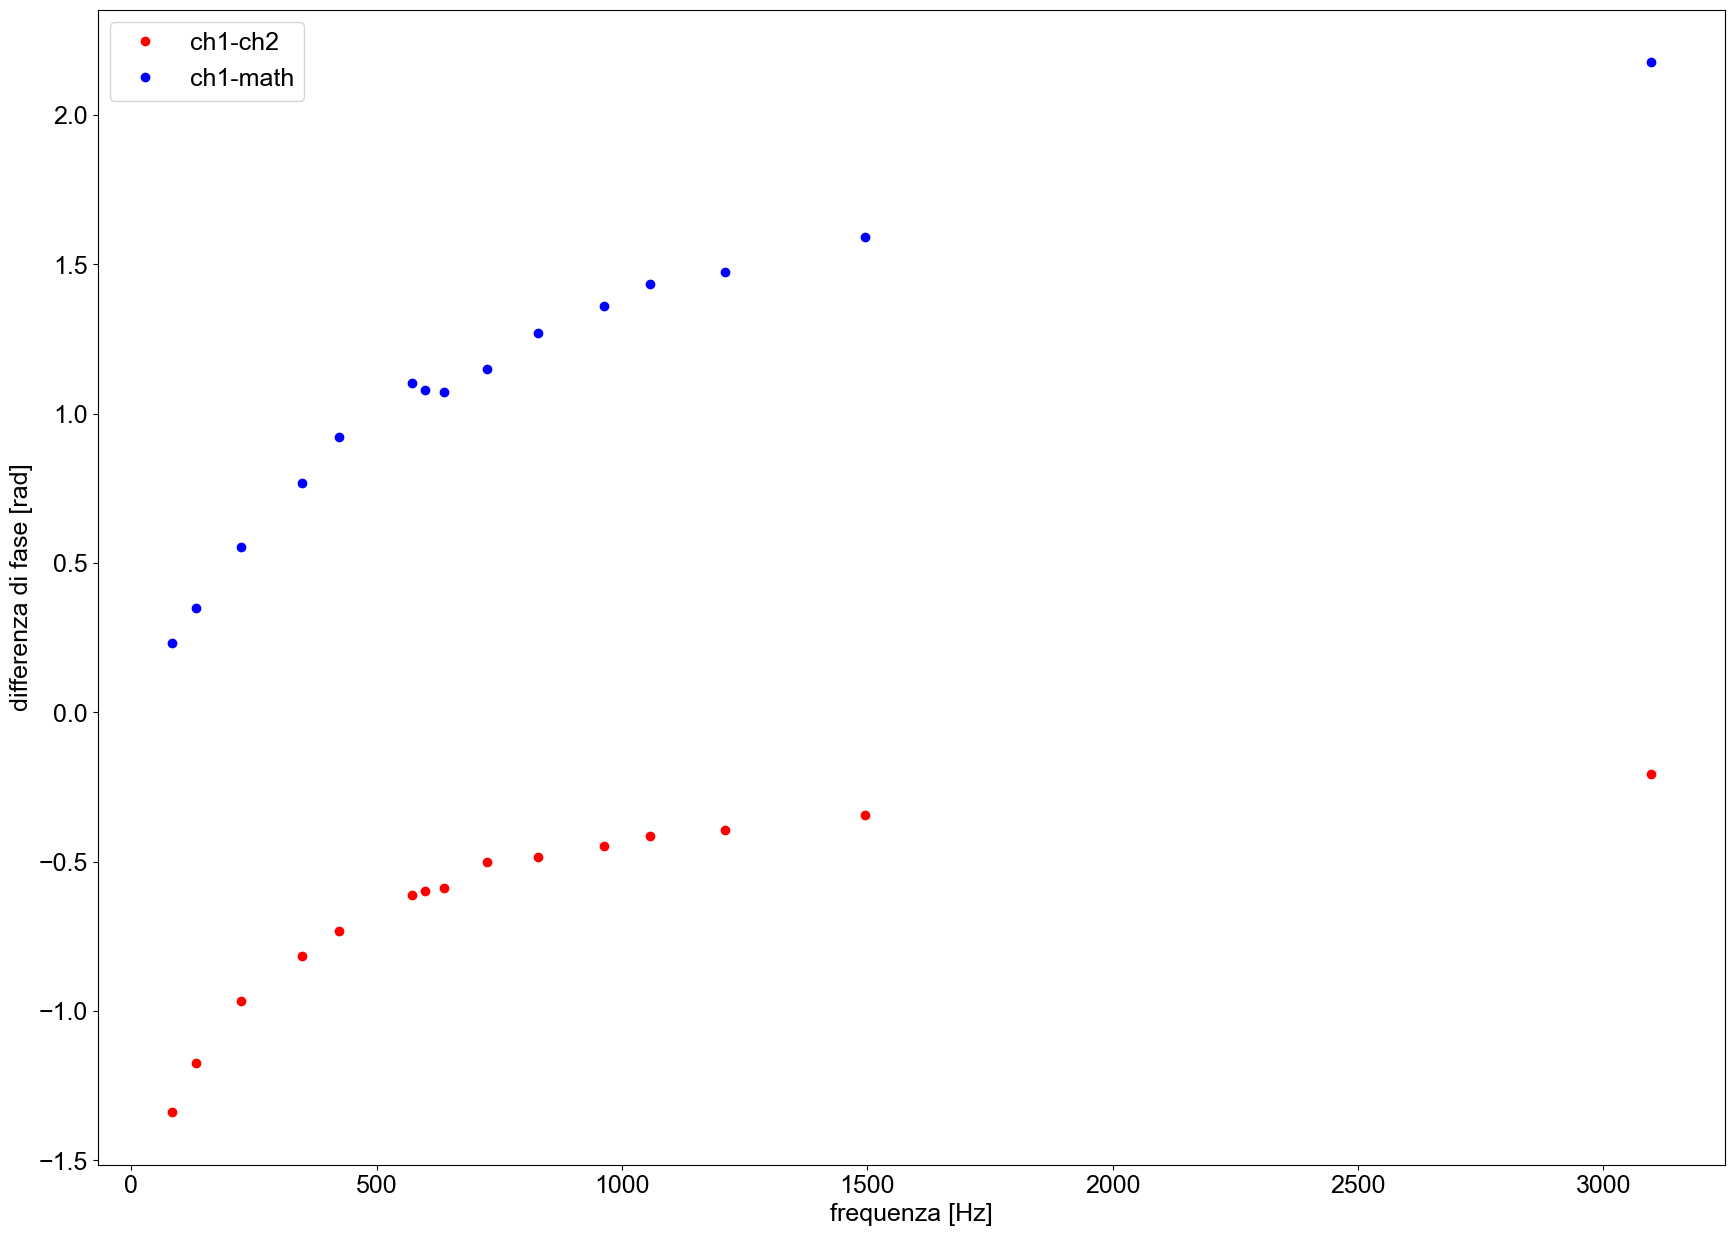

In [10]:
"""Read all the folders in the data folder and compute the phase difference between the two channels"""
#loop over all the folders
phase_diff_ch1_ch2_list = []
phase_diff_ch1_mth_list = []
freqencies = []
for folder in os.listdir("data/RC"):
    #load the data
    #check if the folder is a folder
    if os.path.isdir("data/RC/"+folder):
        data_gen = pd.read_csv("data/RC/"+folder+"/F0000CH1.CSV")
        data_gen = data_gen.iloc[18:]
        data_gen = data_gen.iloc[:,[3,4]]
        data_gen.columns = ["time", "voltage"]
        data_ch2 = pd.read_csv("data/RC/"+folder+"/F0000CH2.CSV")
        data_ch2 = data_ch2.iloc[18:]
        data_ch2 = data_ch2.iloc[:,[3,4]]
        data_ch2.columns = ["time", "voltage"]
        daata_mth = pd.read_csv("data/RC/"+folder+"/F0000MTH.CSV")
        daata_mth = daata_mth.iloc[18:]
        daata_mth = daata_mth.iloc[:,[3,4]]
        daata_mth.columns = ["time", "voltage"]
        #compute the phase difference
        phase_diff_ch1_ch2_result = phase_diff(data_gen["voltage"], data_ch2["voltage"])
        phase_diff_ch1_mth_result = phase_diff(data_gen["voltage"], daata_mth["voltage"])
        phase_diff_ch1_ch2_list.append(phase_diff_ch1_ch2_result)
        phase_diff_ch1_mth_list.append(phase_diff_ch1_mth_result)
        #get the frequency as the name of the folder where "_" = "."
        freqencies.append(float(folder.replace("_",".")))

#plot the phase difference only points in red
plt.plot(freqencies, phase_diff_ch1_ch2_list, "ro", label="ch1-ch2")
plt.plot(freqencies, phase_diff_ch1_mth_list, "bo", label="ch1-math")
#add legend and labels
plt.xlabel("frequenza [Hz]")
plt.ylabel("differenza di fase [rad]")
plt.legend()


Text(0, 0.5, 'phase difference [rad]')

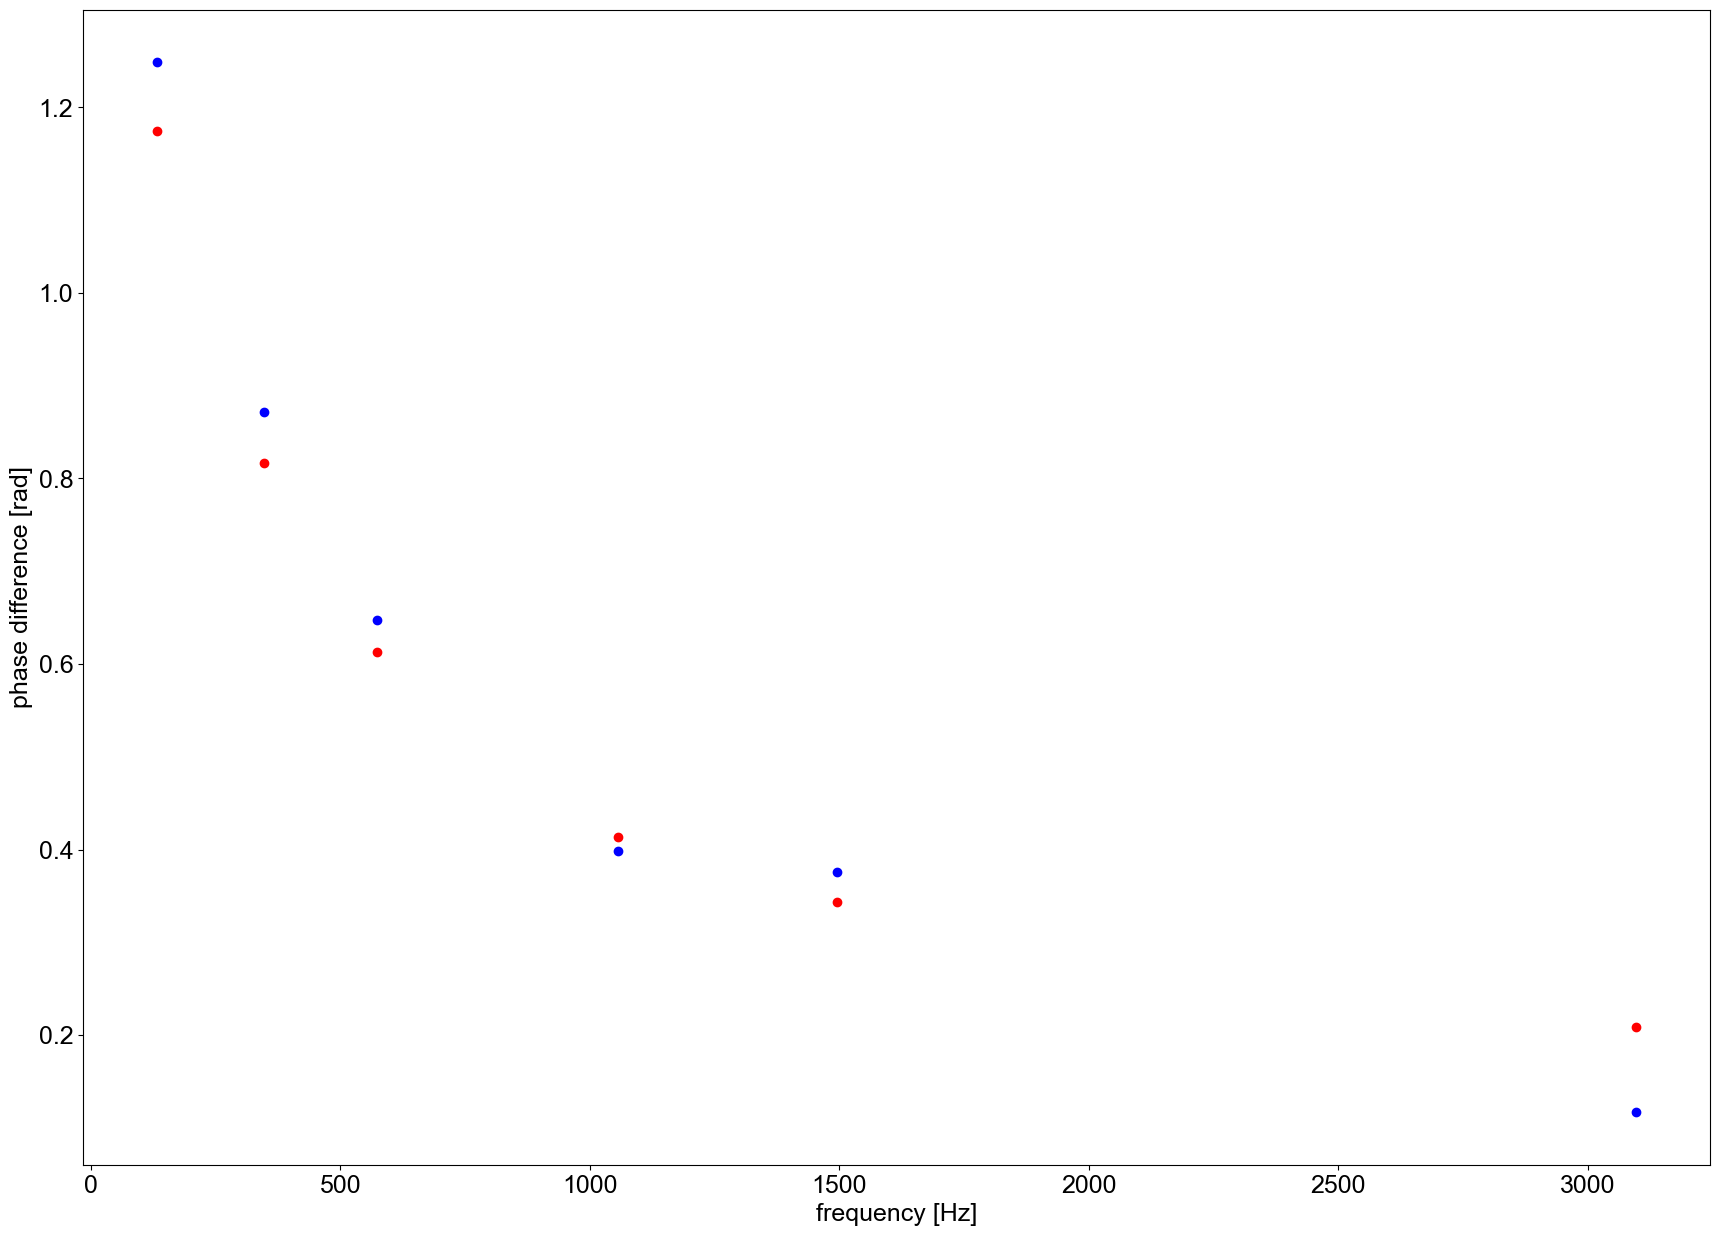

In [25]:
#manually calculate the phase difference
deltas_t = [60, 1500, 40, 6, 400, 180] #are in microseconds
deltas_t = [delta_t*1e-6 for delta_t in deltas_t] #convert to seconds
#delta_phi = 2*pi*f*delta_t
deltas_phi = [2*np.pi*freq*delta_t for freq, delta_t in zip(freqencies, deltas_t)]

#plot manually calculated phase difference and the one calculated above
plt.plot(freqencies, deltas_phi, "bo")
plt.plot(freqencies, phase_diff_list, "ro")
#name the axis
plt.xlabel("frequency [Hz]")
plt.ylabel("phase difference [rad]")

In [11]:
###Convert to clustered data

for folder in os.listdir("data/RC"):
    #read CH1, CH2 and MTH data
    #check if the folder is a folder
    if os.path.isdir("data/RC/"+folder):
        data_gen = pd.read_csv("data/RC/"+folder+"/F0000CH1.CSV")
        data_gen = data_gen.iloc[18:]
        data_gen = data_gen.iloc[:,[3,4]]
        data_gen.columns = ["time", "voltage"]
        data_ch2 = pd.read_csv("data/RC/"+folder+"/F0000CH2.CSV")
        data_ch2 = data_ch2.iloc[18:]
        data_ch2 = data_ch2.iloc[:,[3,4]]
        data_ch2.columns = ["time", "voltage"]
        data_math = pd.read_csv("data/RC/"+folder+"/F0000MTH.CSV")
        data_math = data_math.iloc[18:]
        data_math = data_math.iloc[:,[3,4]]
        data_math.columns = ["time", "voltage"]
        #cluster the data
        data_gen_c_t, data_gen_c_v, data_gen_c_t_err, data_gen_c_v_err = lu.simple_sampling(data_gen["time"], data_gen["voltage"], 100)
        data_ch2_c_t, data_ch2_c_v, data_ch2_c_t_err, data_ch2_c_v_err = lu.simple_sampling(data_ch2["time"], data_ch2["voltage"], 100)
        data_math_c_t, data_math_c_v, data_math_c_t_err, data_math_c_v_err = lu.simple_sampling(data_math["time"], data_math["voltage"], 100)
        #export the data as csv
        data_gen_c = pd.DataFrame({"time": data_gen_c_t, "voltage": data_gen_c_v, "time_err": data_gen_c_t_err, "voltage_err": data_gen_c_v_err})
        data_gen_c.to_csv("data/RC/"+folder+"/CH1_clustered.CSV", index=False)
        data_ch2_c = pd.DataFrame({"time": data_ch2_c_t, "voltage": data_ch2_c_v, "time_err": data_ch2_c_t_err, "voltage_err": data_ch2_c_v_err})
        data_ch2_c.to_csv("data/RC/"+folder+"/CH2_clustered.CSV", index=False)
        data_math_c = pd.DataFrame({"time": data_math_c_t, "voltage": data_math_c_v, "time_err": data_math_c_t_err, "voltage_err": data_math_c_v_err})
        data_math_c.to_csv("data/RC/"+folder+"/MTH_clustered.CSV", index=False)
    

    

In [12]:
#make a list of all folders
folders = []
for folder in os.listdir("data/RC"):
    #check if it is a folder
    if os.path.isdir("data/RC/" + folder):
        #add the folder to the list
        folders.append("../data/RC/" + folder)

#writing the data to a csv file with pandas folders name and frequency
df_p = pd.DataFrame({"folder": folders})
df_p.to_csv("data/RC/folders.csv", index=False)
df_f = pd.DataFrame({"frequency": freqencies})
df_f.to_csv("data/RC/frequences.csv", index=False)

<ErrorbarContainer object of 3 artists>

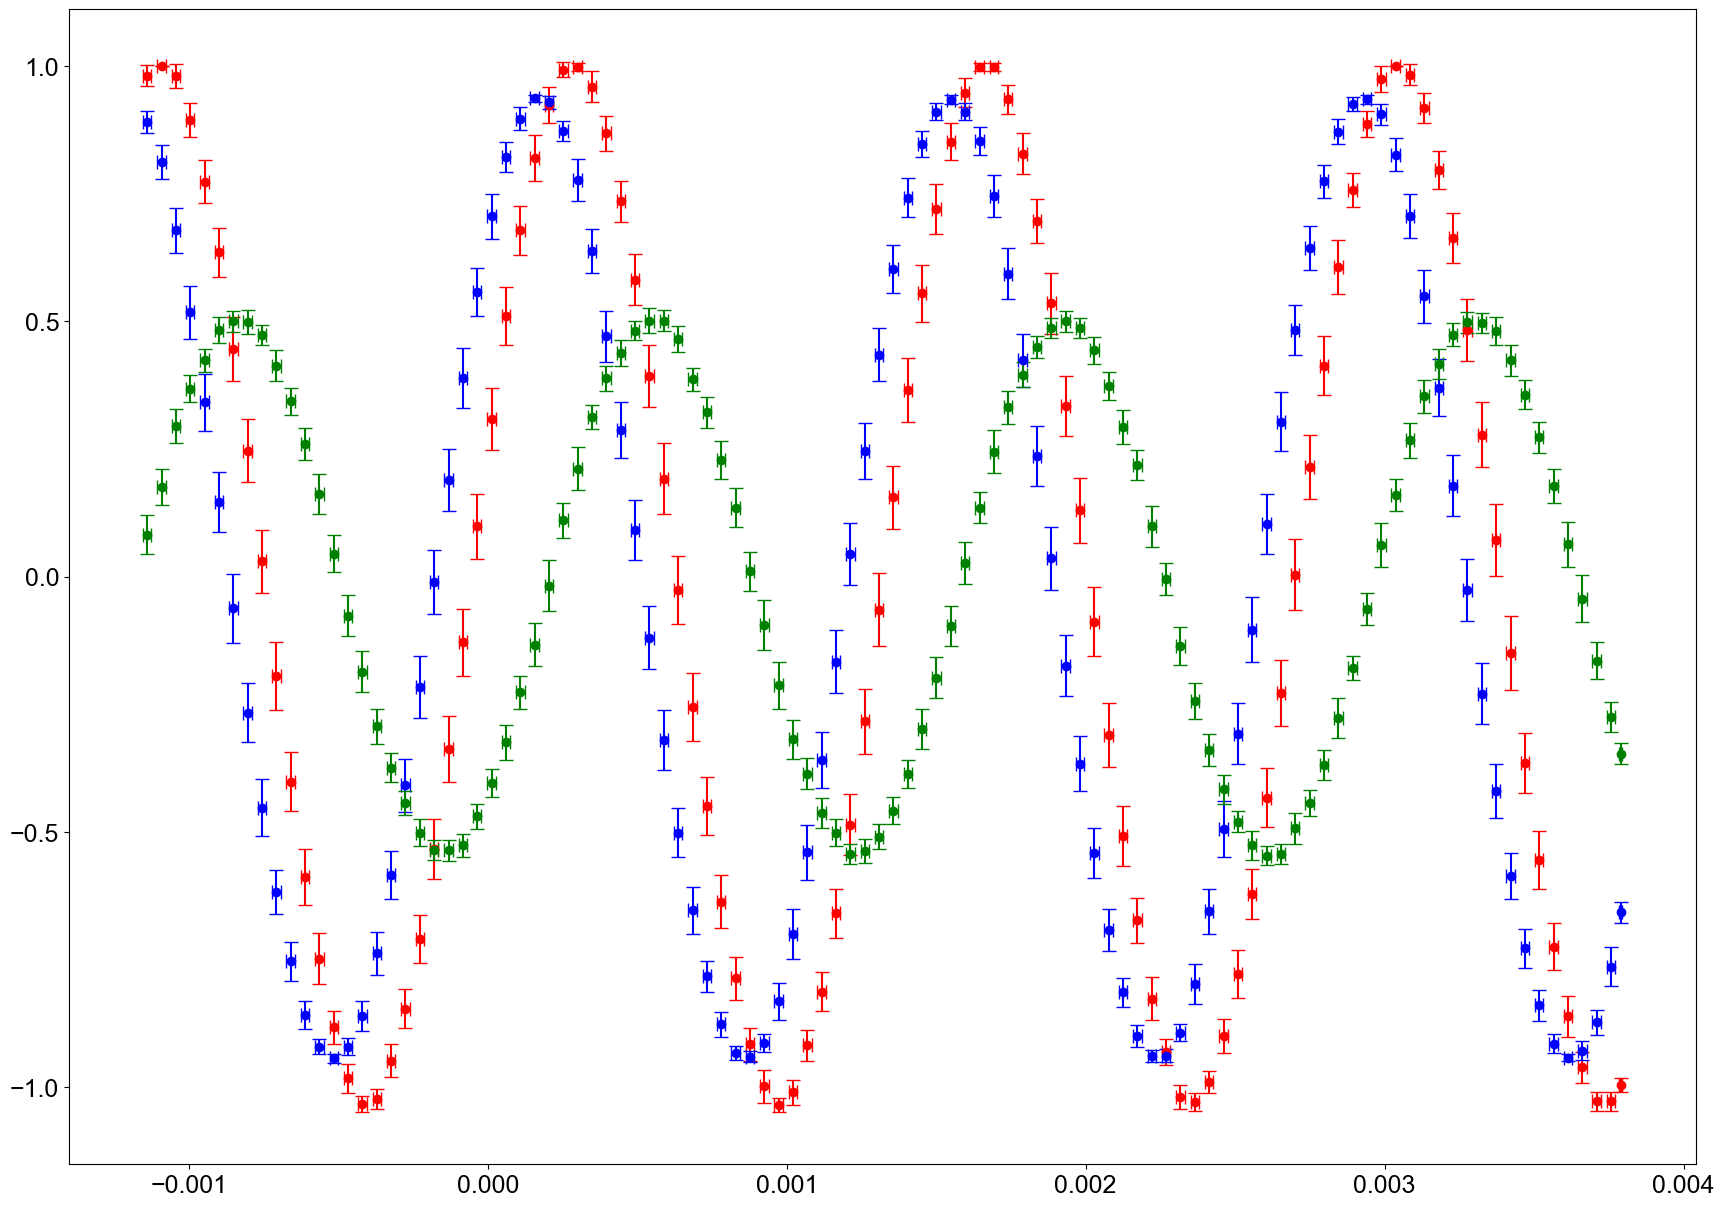

In [15]:
#plot one example of clustered data (CH1, CH2 and MTH)
data_gen = pd.read_csv("data/RC/725_1/CH1_clustered.CSV")
data_ch2 = pd.read_csv("data/RC/725_1/CH2_clustered.CSV")
data_math = pd.read_csv("data/RC/725_1/MTH_clustered.CSV")
plt.errorbar(data_gen["time"], data_gen["voltage"], xerr=data_gen["time_err"], yerr=data_gen["voltage_err"], fmt="ro")
plt.errorbar(data_ch2["time"], data_ch2["voltage"], xerr=data_ch2["time_err"], yerr=data_ch2["voltage_err"], fmt="bo")
plt.errorbar(data_math["time"], data_math["voltage"], xerr=data_math["time_err"], yerr=data_math["voltage_err"], fmt="go")
